# **Graded Challenge 4 - Phase 1**

# **1. Perkenalan**

Nama : **`Evita Ardhiya Ramadhani`**, Batch: `11`

Query dataset: SELECT * FROM `ftds-hacktiv8-project.phase1_assignments.credit-card-information` where mod(CUST_ID, 2) != 0;

Problem: membuat model clustering untuk melakukan **Customer Segmentation** dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

Assigment objective:
- Mampu memperoleh data menggunakan BigQuery
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mengimplementasikan Clustering pada data yang diberikan

# **2. Import Libraries**

Import libraries yang digunakan dalam assigment

In [1]:
# load data dan linear algebra
import pandas as pd
import numpy as np

# visualisasi atau plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# handling outliers
from feature_engine.outliers import Winsorizer

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# reduksi dimensi
from sklearn.decomposition import PCA

# metrics
from sklearn.metrics import silhouette_score

# model clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# **3. Data Loading**

Load data menggunakan library pandas, setelah itu melakukan ekplosari data seperti info, describe dan sebagainya.

In [2]:
# load dataset
data =pd.read_csv('h8dsft_P1G4_Evita_Ardhiya_Ramadhani.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


**Keterangan kolom**

- **CUST_ID** : Identitas Pemegang Kartu Kredit (Kategoris)
- **BALANCE** : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
- **BALANCE_FREQUENCY** : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
- **PURCHASES** : Jumlah pembelian yang dilakukan dari akun
- **ONEOFF_PURCHASES** : Jumlah pembelian maksimum yang dilakukan dalam sekali jalan
- **INSTALLMENTS_PURCHASES** : Jumlah pembelian yang dilakukan secara mencicil
- **CASH_ADVANCE** : Uang tunai di muka yang diberikan oleh pengguna
- **PURCHASES_FREQUENCY** : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
- **ONEOFF_PURCHASES_FREQUENCY** : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
- **PURCHASES_INSTALLMENTS_FREQUENCY**: Seberapa sering dilakukan pembelian secara mencicil (1 = sering dilakukan, 0 = tidak sering dilakukan)
- **CASH_ADVANCE_FREQUENCY** : Seberapa sering uang tunai di muka dibayarkan
- **CASH_ADVANCE_TRX** : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
- **PURCHASES_TRX** : Jumlah transaksi pembelian yang dilakukan
- **CREDIT_LIMIT** : Batas Kartu Kredit untuk pengguna
- **PAYMENTS** : Jumlah Pembayaran yang dilakukan oleh pengguna
- **MINIMUM_PAYMENTS** : Jumlah pembayaran minimum yang dilakukan oleh pengguna
- **PRC_FULL_PAYMENT** : Persentase pembayaran penuh yang dibayarkan oleh pengguna
- **TENURE** : Jangka waktu layanan kartu kredit untuk pengguna

Duplicate dataset sebelum dilakukan prosessing agar dataset asli tidak berubah jika sewaktu-waktu digunakan

In [3]:
# duplicate dataset
data_copy = data.copy()

Menampilkan head dan tail.

In [4]:
# head dari dataset
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [5]:
# tail dari dataset
data.tail(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


Menampilkan info untuk mengetahui tipe dari masing-masing kolom

In [6]:
# info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Melihat data statistik dasar dari dataset

In [7]:
# describe dataset
data.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **4. Exploratory Data Analysis (EDA)**

## Heatmap korelasi fitur

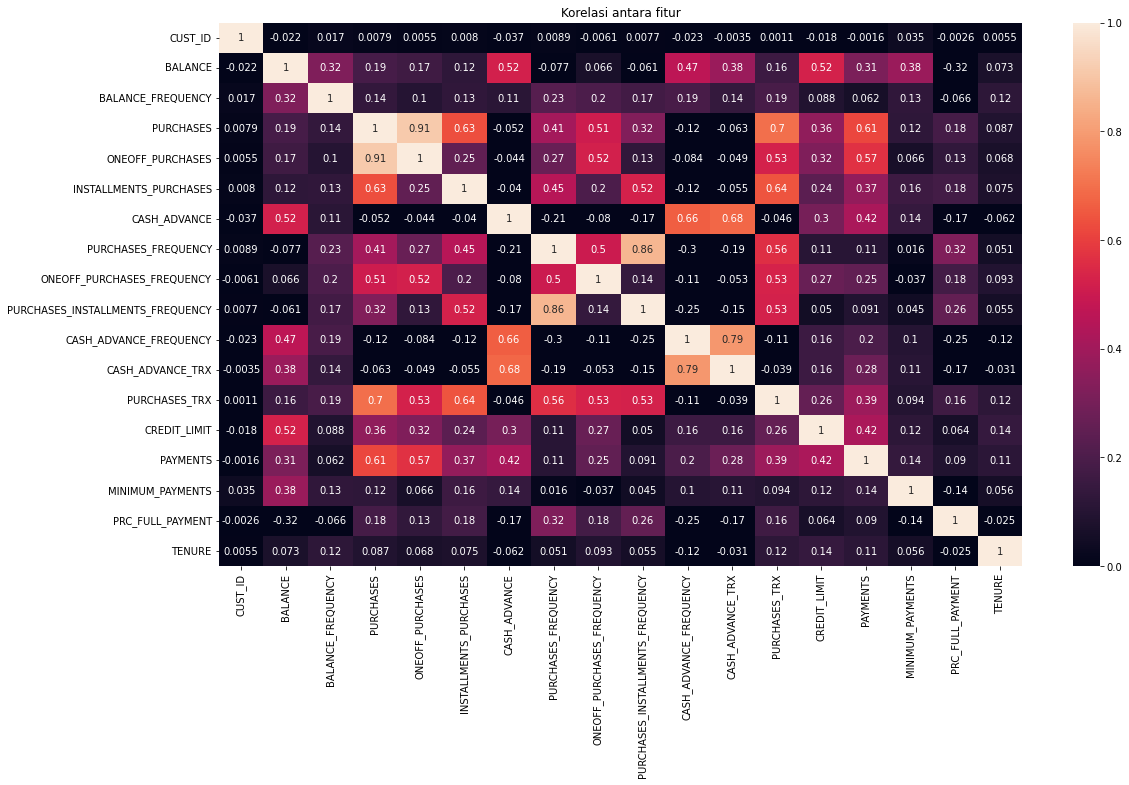

In [8]:
# siapkan kolom yang akan digunakan
korelasi = data.corr()

# buat heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(korelasi, annot= True, vmin=0, vmax=1)
plt.title('Korelasi antara fitur')
plt.show()

Dari korelasi fitur-fitur diatas, banyak fitur yang memiliki korelasi antar fitur atau multicollinearity. Untuk menghindari adanya overfitting pada model maka akan dilakukan reduksi dimensi agar informasi dari tiap-tiap kolom dapat dibawa secukupnya (tidak double).

## Apakah jumlah Balance berbanding lurus dengan Credit limit? 

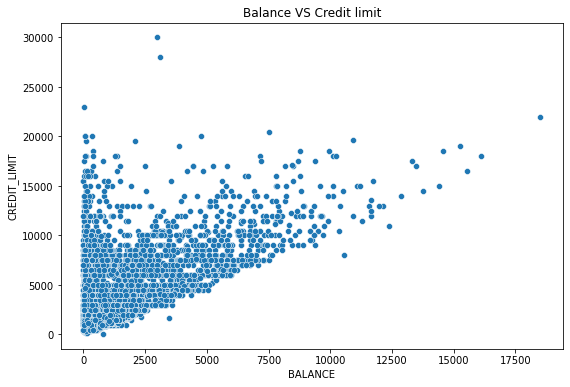

In [9]:
# scatterplot balance dan limit balance
plt.figure(figsize=(9, 6))
sns.scatterplot(x='BALANCE',y='CREDIT_LIMIT',data=data)
plt.title('Balance VS Credit limit')
plt.show()

Dapat dilihat dari scatterplot diatas bahwa credit limit dipengaruhi oleh balance. Balance atau saldo yang ada secara garis besar menggambarkan kondisi finansial customer, oleh karena itu jika semakin tinggi saldo yang dimiliki maka pihak kartu kredit akan memberikan limit kredit yang tinggi juga. Tetapi tidak 100% credit limit ini dipengaruhi oleh saldo karena pada scatter plot diatas masih ada cutomer yang memiliki saldo rendah tetapi memiliki limit kredit yang tinggi. Hal ini bisa saja disebabkan karena penentuan limit kredit selain dari saldo bisa juga dengan fitur yang lain seperti jenis kartu, layanan dan kebijakan dari perusahaan sendiri.

# **5. Data Preprocessing**

## Split data Inferece

Data inferece digunakan nantinya sebagai model inferece apabila telah berhasil dibuat model terbaik.

In [10]:
# mengambil 100 data untuk data inference
data_inf = data.sample(100, random_state= 17)

# menghapus data inference dari dataset
data_set = data.drop(data_inf.index)

# Reset index data-set
data_set.reset_index(drop=True, inplace=True)

# Reset index data inference
data_inf.reset_index(drop=True, inplace=True)

In [11]:
# display data infecere
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,8691,6644.829230,1.000000,0.00,0.00,0.00,2557.006793,0.000000,0.000000,0.000000,0.250000,9,0,7600.0,1648.570068,2284.360915,0.000000,12
1,7711,7.696813,0.090909,111.30,111.30,0.00,101.656544,0.083333,0.083333,0.000000,0.083333,1,2,1200.0,0.000000,NaN,0.000000,12
2,1795,850.630114,1.000000,0.05,0.05,0.00,1700.634586,0.083333,0.083333,0.000000,0.333333,7,1,1000.0,1084.281127,367.409536,0.000000,12
3,2849,391.508345,0.888889,80.99,80.99,0.00,2867.104779,0.111111,0.111111,0.000000,0.333333,3,1,1500.0,3855.328673,149.615036,0.200000,9
4,6567,349.855056,1.000000,3200.50,2097.88,1102.62,0.000000,1.000000,1.000000,1.000000,0.000000,0,50,7000.0,3119.528249,192.900599,1.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1347,666.123984,1.000000,1999.70,351.00,1648.70,0.000000,0.916667,0.250000,0.750000,0.000000,0,15,3100.0,667.118376,264.338574,0.200000,12
96,3007,6.247620,0.272727,108.20,0.00,108.20,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,4500.0,0.000000,NaN,0.000000,12
97,8663,680.079404,1.000000,636.41,106.01,530.40,2525.736564,1.000000,0.083333,1.000000,0.250000,10,19,12000.0,309.998666,266.056225,0.000000,12
98,7,16.379412,0.454545,178.15,0.00,178.15,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,5000.0,229.376368,89.613822,0.181818,12


## Feature Selection

In [12]:
# data display
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


kolom CUST_ID memiliki nilai yang berbeda-beda karena ini merupakan identitas dari masing-masing customer dan apabila ada customer yang memiliki id tertentu maka tidak akan ada pengaruhnya. Oleh karena itu kolom CUST_ID ini akan didrop karena jika nilainya berbeda tidak akan berpengaruh dan tidak ada CUST_ID yang spesial. 

In [13]:
# drop kolom CUST_ID
data_set.drop(['CUST_ID'], axis=1, inplace=True)

## Data Cleaning

### cek missing value dari masing-masing kolom

In [14]:
# cek missing value
data_set.isnull().mean()

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000000
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.033829
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Karena pada kolom MINIMUM_PAYMENTS terdapat missing value yang nilainya 3.38% maka akan dilakukan imputation missing value. Sebelum dilakukan imputation maka akan dicek distribusi dari kolom untuk mengetahui imputatipn menggunakan mean atau median.

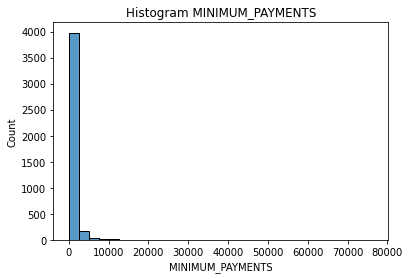

In [15]:
# jenis distribusi kolom
sns.histplot(data_set['MINIMUM_PAYMENTS'], bins=30)
plt.title('Histogram MINIMUM_PAYMENTS')
plt.show()

Pada kolom MINIMUM_PAYMENTS distribusinya adalah right-skew, maka akan digunakan median imputation untuk mengganti missing value.

In [16]:
# replace missing value MINIMUM_PAYMENTS
data_set['MINIMUM_PAYMENTS'].fillna(data_set['MINIMUM_PAYMENTS'].median(), inplace=True)

In [17]:
# cek kembali missing value
data_set['MINIMUM_PAYMENTS'].isnull().mean()

0.0

### Cek outliers

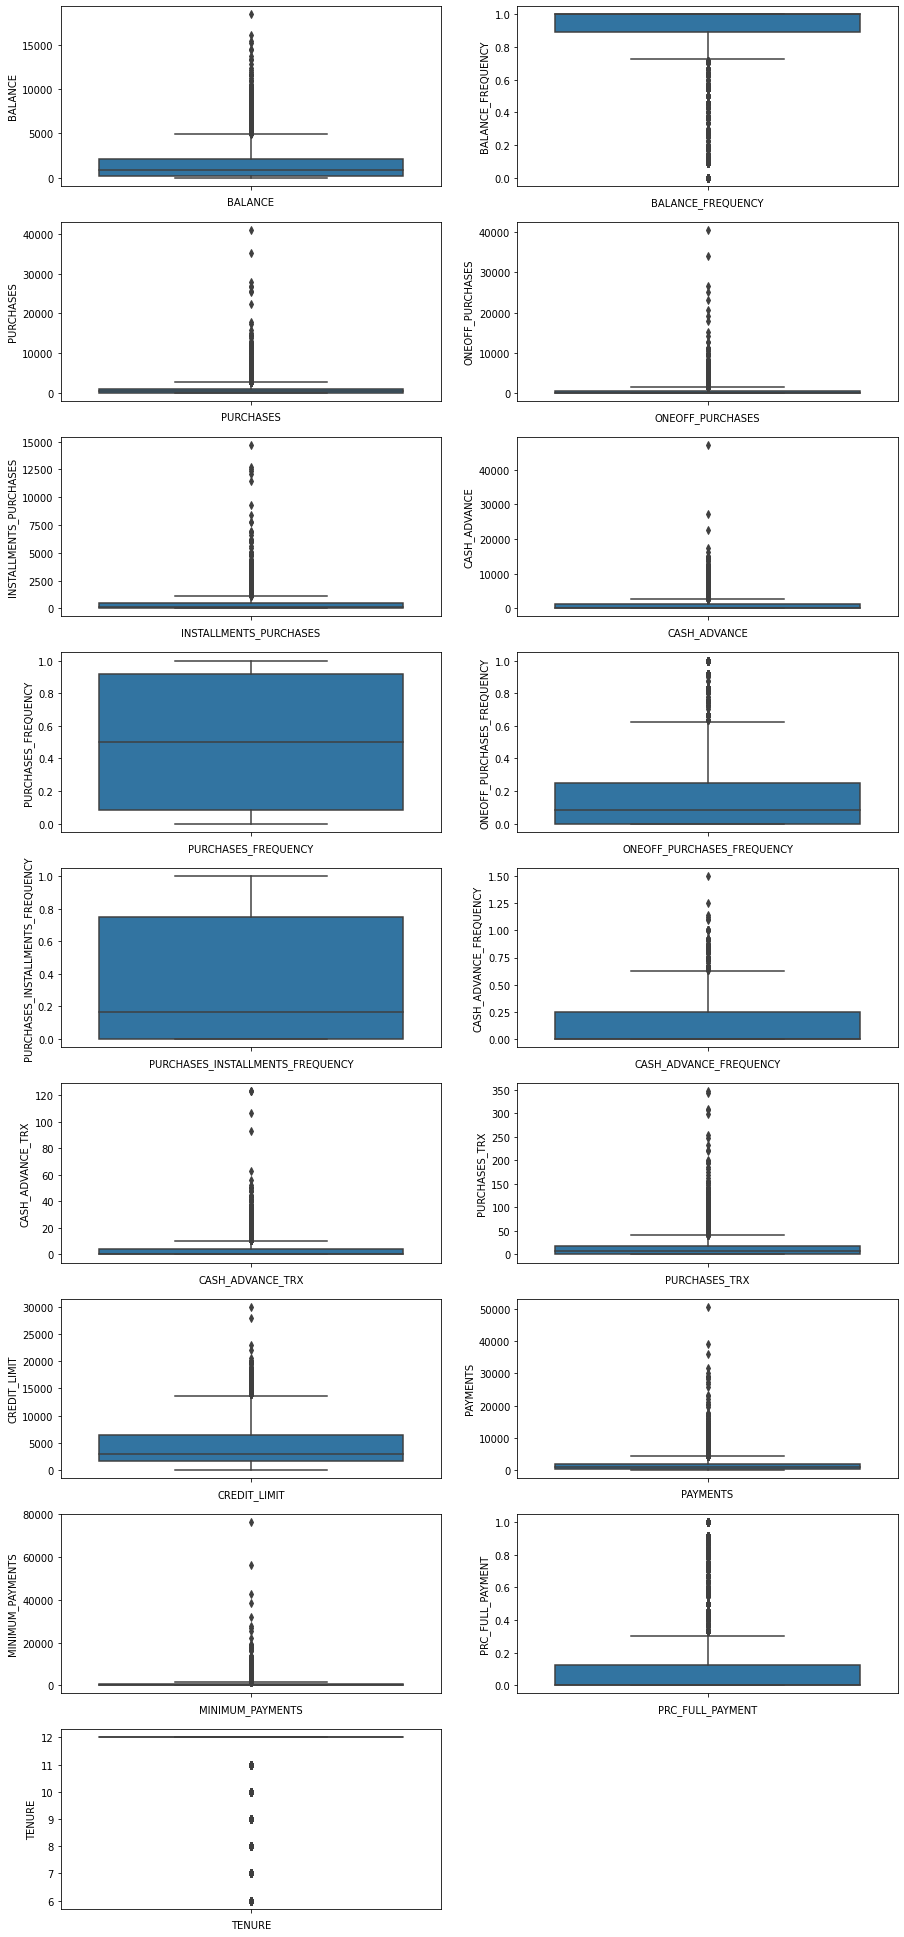

In [18]:
# definisikan besar figsize
plt.figure(figsize=(15,35))

# buat looping untuk boxplot kolom
for i, col in enumerate(data_set.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.boxplot(y=data_set[col])
        plt.xlabel(col)
        
plt.show()

Dari boxplot diatas hampir semua kolom memiliki outliers, tetapi hanya kolom-kolom berikut yang akan dilakukan handling outliers,

In [19]:
# kolom yang akan dihanling outliers
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

Handling outliers akan menggunakan capping menggunakan Winsorizer dengan median imputation

In [20]:
# membuat capper dengan median imputation
windsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=cols)

# fit dan transform data
data_handle = windsoriser.fit_transform(data_set)

 boxplot setelah handling outliers


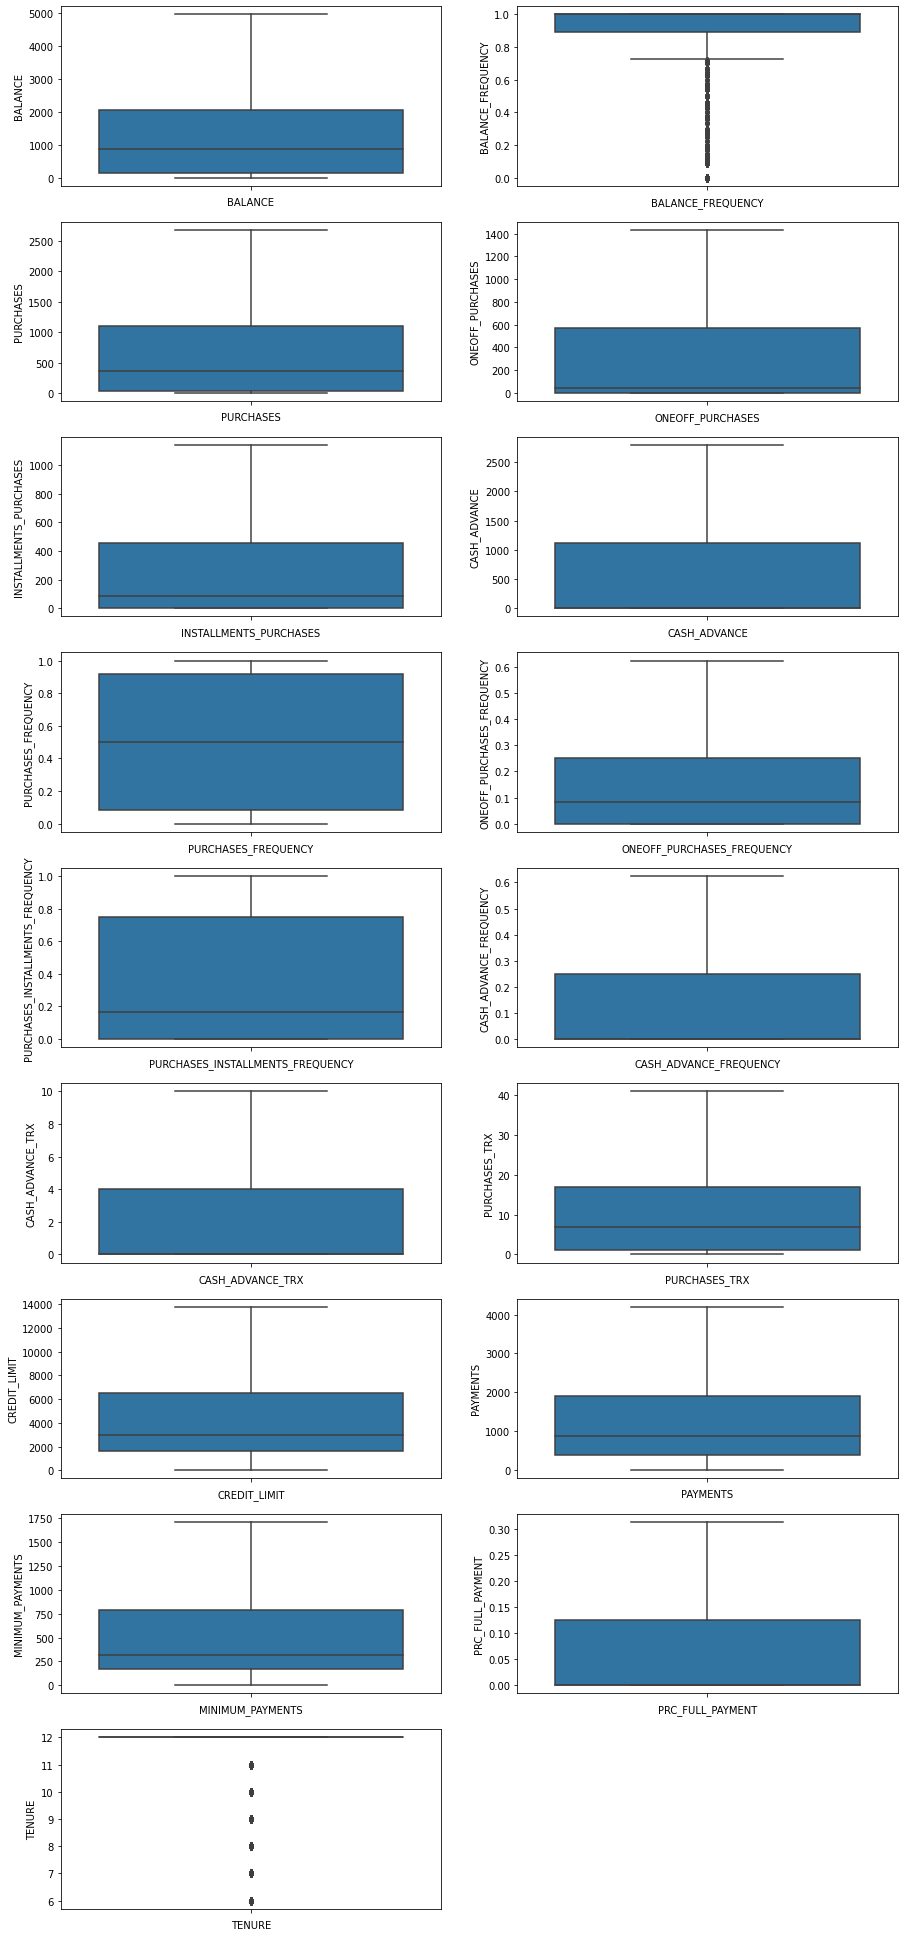

In [21]:
print(' boxplot setelah handling outliers')
# definisikan besar figsize
plt.figure(figsize=(15,35))

# buat looping untuk boxplot kolom
for i, col in enumerate(data_handle.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.boxplot(y=data_handle[col])
        #.histplot(data[col], bins=30, ax=ax)
        #sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

## Feature Scaling

Karena clustering dilakukan ada berdasarkan jarak, maka perlu dilakukan scaling untuk menyamakan range data antar kolom.

In [22]:
# definisikan scaling
scaler = MinMaxScaler()

# fit dan transform data scaling
data_scaled = scaler.fit_transform(data_handle)

In [23]:
# Display data yang sudah scalin
data_scaled_df = pd.DataFrame(data_scaled, columns=data_handle.columns)
data_scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.000773,0.125,0.016748,0.031384,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.032787,0.000000,0.182939,0.0,0.333333
1,0.000000,0.000,0.065514,0.122766,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.506375,0.000000,0.182939,0.0,0.333333
2,0.152833,0.875,0.058580,0.109773,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.146341,0.083789,0.355482,1.000000,0.0,0.333333
3,0.053346,0.375,0.428000,0.802029,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.083789,0.720579,0.049953,0.0,0.333333
4,0.088843,1.000,0.223304,0.418450,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.069217,0.051216,0.080610,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,1.000000,1.000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.872728,0.9,0.000000,0.870674,0.587282,1.000000,0.0,0.833333
4371,0.209707,1.000,0.000000,0.000000,0.0,0.497933,0.000000,0.000000,0.0,0.872728,1.0,0.000000,0.098361,0.069011,0.168427,0.0,0.833333
4372,0.266727,1.000,0.000000,0.000000,0.0,0.272948,0.000000,0.000000,0.0,0.872728,1.0,0.000000,0.105647,0.246338,0.182956,0.0,0.833333
4373,0.213813,1.000,0.000000,0.000000,0.0,0.528444,0.000000,0.000000,0.0,0.872728,1.0,0.000000,0.142077,0.096896,0.162046,0.0,0.833333


## Cek Multicollinearity

In [24]:
#Cek Multicollinearity
vif_data = pd.DataFrame()
vif_data["fitur"] = data_scaled_df.columns
  
# cari nilai VIF setiap fitur
vif_data["VIF"] = [variance_inflation_factor(data_scaled_df.values, i) for i in range(len(data_scaled_df.columns))]

# tampilkan tanel VIF
vif_data

,fitur,VIF
0,BALANCE,10.389362
1,BALANCE_FREQUENCY,14.567967
2,PURCHASES,27.859554
3,ONEOFF_PURCHASES,16.296551
4,INSTALLMENTS_PURCHASES,11.350818
5,CASH_ADVANCE,5.300584
6,PURCHASES_FREQUENCY,26.078751
7,ONEOFF_PURCHASES_FREQUENCY,10.217946
8,PURCHASES_INSTALLMENTS_FREQUENCY,21.998192
9,CASH_ADVANCE_FREQUENCY,11.975057


- Dari nilai variance_inflation_factor dapat dilihat hanya fitur/kolom CREDIT_LIMIT, PAYMENTS dan PRC_FULL_PAYMENT yang memiliki nilai VIF dibawah dari 5. Artinya fitu-fitur tersebut tidak saling berkaitan.
- Jadi fitur-fitur tersebut dapat direduksi hingga menjadi 4 dimensi.

## Reduksi Dimensi menggunakan PCA

Defisinikan PCA yang akan digunakan untuk reduksi dimensi fitur

In [25]:
# definisikan pca dan jumlah fitur keselruhan
pca = PCA(n_components=16)

# fit data scaled untuk pca
pca.fit(data_scaled)

PCA(n_components=16)

Melihat grafik dari EVR untuk melihat informasi yang dibawa dalam hasil reduksi dimensi tiap banyaknya n_components

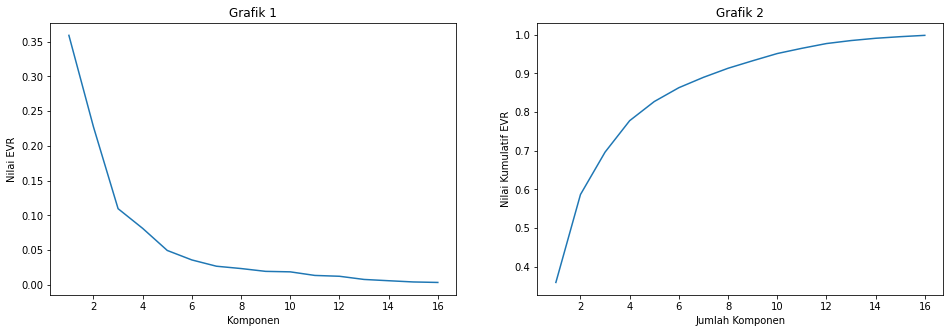

In [26]:
# grafik komponen ke berapa terjadi patahan
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,17), pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Nilai EVR')
ax[0].set_title('Grafik 1')

# jumalah informasi yang dibawa dari komponen
ax[1].plot(range(1,17), np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Nilai Kumulatif EVR')
ax[1].set_title('Grafik 2')

plt.show()

- Dari grafik 1 dapat dilihat bahwa patahan yang tidak memiliki perubahan signifikan berada pada komponen 5.
- dari grafik 2 jumlah informasi yang dibawa dalam nilai komponen 5 dengan nilai EVR 0.8. Kemungkinan dengan jumlah 5 komponen merupakan jumlah terbaik untuk informasi yang dibawa 80%, tetapi dengan 8 komponen bisa mendapatkan informasi sebanyak 90%. Jadi reduksi dimensi yang akan digunakan menjadi 8 dimensi dari 16 fitur yang ada.

Reduksi dimensi menjadi 8 komponen dengan informasi yang dibawa adalah 90%

In [27]:
# pca dengan 8 komponen
pca1 = PCA(n_components=8)

# fit dan tranform data yang sudah discaling
data_pca = pca1.fit_transform(data_scaled)

Hasil reduksi dibuat dalam dataframe dengan 8 kolom

In [28]:
data_pca_df = pd.DataFrame(data_pca, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])
data_pca_df

,X1,X2,X3,X4,X5,X6,X7,X8
0,-0.647212,-0.791781,-0.308431,-0.199901,0.221927,0.366311,0.618223,0.166357
1,-0.587033,-0.693989,-0.398911,-0.157880,0.056745,0.431328,0.860766,-0.071233
2,-0.533891,-0.179040,-0.220666,-0.429827,-0.188680,-0.120547,0.319195,0.606949
3,-0.196161,-0.342314,-0.803930,-0.017080,0.048189,0.691337,0.369462,0.411401
4,-0.419537,-0.532284,-0.485236,-0.252427,0.270364,0.059884,0.211893,0.523675
...,...,...,...,...,...,...,...,...
4370,-1.218907,1.336872,0.260344,0.160274,-0.328042,-0.158403,0.242457,-0.061988
4371,-1.149969,0.260615,0.140653,0.252900,0.594127,0.070285,-0.268872,0.109899
4372,-1.090176,0.249916,0.098377,0.217942,0.477385,0.089194,-0.320237,0.153493
4373,-1.150537,0.288669,0.139751,0.272099,0.573431,0.082608,-0.254643,0.084368


# **6. Pembuatan Model**

Visualisasikan data aslinya

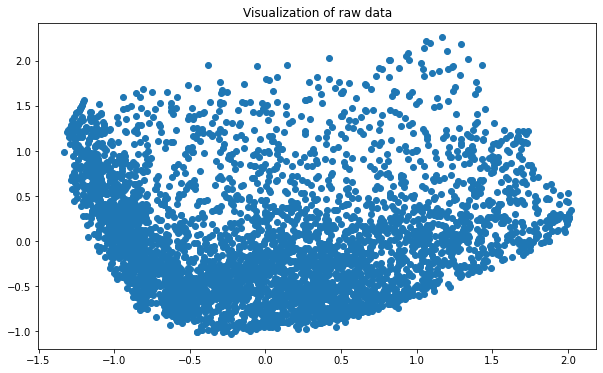

In [29]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(data_pca_df.iloc[:, 0], data_pca_df.iloc[:, 1])
plt.title('Visualization of raw data')
plt.show()

## **6.1 K-Means**

Definisikan model k-means yang akan digunakan

In [30]:
# definisikan model
kmeans = KMeans(n_clusters=i, random_state = 17)

Gunakan **elbow method** untuk mencari berapa banyak cluster yang ideal dibuat

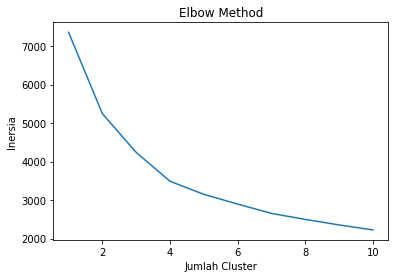

In [31]:
# buat looping untuk menghitung inersia dari masing-masing banyanya kluster
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 17)
    kmeans.fit(data_pca)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.show()

- Dari grafik elbow method diatas patahan terjadi pada jumlah cluster = 4
- semakin tinggi nilai inersianya maka akan semakin sedikit jumlah clusternya. Karena inersia merupakan seberapa besar radius dari sebuah cluster dan setiap cluster memiliki nilai inersia atau radius yang sama besar.
- inersia terlalu kecil bisa saja datanya tidak masuk dalam cluster tesebut, sedangkan jika inersia terlalu besar ditakutkan akan ada unit data uang masuk dalam cluster yang bukan tempatnya.
- inersia dan jumlah inersia berbanding terbalik.

Untuk lebih menyakinkan maka digunakan validasi pemilihan nilai k menggunakan **silhouette score**

In [32]:
# buat looping untuk kmeans
kmeans_per_k = [KMeans(n_clusters=i, random_state=17).fit(data_pca)
                for i in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

# silhouette scores
silhouette_scores = [silhouette_score(data_pca, model.labels_)
                     for model in kmeans_per_k[1:]]

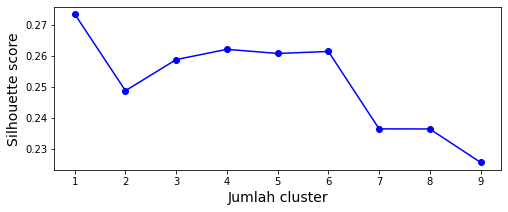

In [33]:
# plot untuk silhouette_scores dengan jumlah 
plt.figure(figsize=(8, 3))
plt.plot(range(1, 10), silhouette_scores, "bo-")
plt.xlabel("Jumlah cluster", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

- Dari grafik silhouette scores diatas dapat dilihat bahwa nilai tertinggi terletak pada 2 cluster. Tetapi dengan mempertimbangkan dari elbow method dengan 4 cluster dan nilai 4 cluster pada silhouette scores memiliki nilai yang cukup tinggi sehingga menggunakan 4 cluster masih memungkinkan.

Setelah menetapkan cluster maka dilakukan data training terhadap jumlah cluster = 4

In [34]:
# definisikan jumlah i (cluster) sesuatu hasil elbow dan silhouette_scores
i = 4

# model
kmeans = KMeans(n_clusters= i, random_state=17)

# training data
kmeans.fit(data_pca)

KMeans(n_clusters=4, random_state=17)

Lakukan prediksi atau memberikan label terhadap data

In [35]:
# prediksi data
label = kmeans.predict(data_pca)
label

array([0, 0, 0, ..., 1, 1, 1])

In [36]:
# inersia dari kmeans
kmeans.inertia_

3488.72978296589

- Nilai inersia merupakan besar radius yang dibuat dalam clustering. Makin besar inersia makin bagus karena semakin banyak data yang bisa dicakupkan didalamnya tetapi jika terlalu besar bisa saja akan menempatkan data poin pada cluster yang tidak seharusnya. Setiap radius atau inersia masing-masing cluster adalah sama besar.

Tampilkan visualisasi dari label masing-masing cluster, sebelum itu lakukan reduksi 2 dimensi terlebih dahulu agar dapat divisualisasikan

In [37]:
# reduksi dimensi menjadi 2
pca_kmeans = PCA(n_components=2)
# fit dan treansform data
pca_vis = pca_kmeans.fit_transform(data_pca)
# masukkan data kedalam dataframe
pca_df = pd.DataFrame.from_records(data=pca_vis, columns=["x1","x2"])
# gabungkan dengan label dari cluster
pca_df["Cluster"] = label + 1

In [38]:
#display dataframe dari hasil reduksi 2 dimensi
pca_df

,x1,x2,Cluster
0,-0.647212,-0.791781,1
1,-0.587033,-0.693989,1
2,-0.533891,-0.179040,1
3,-0.196161,-0.342314,1
4,-0.419537,-0.532284,1
...,...,...,...
4370,-1.218907,1.336872,2
4371,-1.149969,0.260615,2
4372,-1.090176,0.249916,2
4373,-1.150537,0.288669,2


In [39]:
# buat scatter plot untuk visualisasi 2d
fig = px.scatter(pca_df, x="x1", y="x2", color='Cluster', width=700, height=500)
fig.show()

In [40]:
# silhouette_score
silhouette_score(data_pca, kmeans.labels_)

0.258767686987804

Arti warna dari setiap cluster
- kuning = cluster 4
- orange = cluster 3
- ungu = cluster 2
- biru = cluster 1

Dari visualisasi diatas terlihat bahwa jarak antara boundaries-nya masih banyak yang tumpang tindih antar cluster maka dapat dikatakan nilai dari silhouette score tidak sama dengan 1 karena tidak tercluster dengan sempurna.

Untuk analisis dari keseluruhan dataset, mari gabungkan hasil cluster berupa label pada dataset

In [41]:
# gabungkan datset awal dan label hasil clustering
data_set_cluster = pd.concat([(data_set), (pca_df["Cluster"])], axis=1)
data_set_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,312.807548,0.0,8,1
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,312.807548,0.0,8,1
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,1
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,1
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,2
4371,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,2
4372,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,2
4373,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,2


### EDA setelah dilakukan clustering K-means

**1. Berapakah persentase masing-masing setiap cluster?**

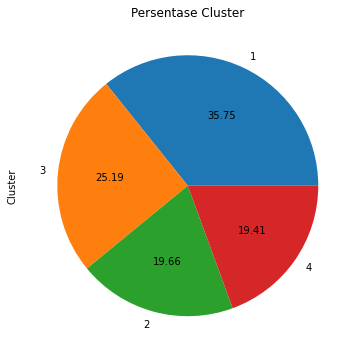

In [42]:
# tampilkan dalam bentuk persentase
data_set_cluster['Cluster'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f')
plt.title('Persentase Cluster')
plt.show()

- Cluster dengan persentase tertinggi oleh cluster 1 dengan nilai 35.75%
- cluster 2 memiliki persentase terendah

**2. Berdasarkan jumlah saldo (balance), cluster manakah yang memiliki rata-rata yang tertinggi?**

In [43]:
# groupby cluster dan rata-rata balance
data_set_cluster.groupby('Cluster')['BALANCE'].mean()

Cluster
1     839.539861
2    3674.820333
3     494.956927
4    2123.618525
Name: BALANCE, dtype: float64

- Berarti cluster 2 (ungu) berkarasteristik memiliki rata-rata jumlah saldo yang tinggi. Dengan adanya korelasi antara jumlah saldo dan limit credit berarti cluster 2 ini rata-rata memiliki jumlah limit kredit yang tinggi.
- Adapun cluster 3 (orange) memiliki rata-rata jumlah saldo yang cukup rendah

**3. Jika berdasarkan pembelian cluster manakah yang memiliki pembelian tertinggi?**

In [44]:
# groupby cluster dan rata-rata PURCHASES
data_set_cluster.groupby('Cluster')['PURCHASES'].sum()

Cluster
1     408447.09
2     222190.95
3     780583.11
4    2978893.80
Name: PURCHASES, dtype: float64

- Jadi cluster 4 meiliki spending money atau jumlah pembelian yang paling tinggi. Hal ini juga disebabkan karena cluster ini memiliki saldo yang tinggi dan juga limit kredit yang tinggi. Kemungkinan pada cluster 4 ini merupakan customer yang bersifat loyal atau kalangan atas.
- Untuk cluster 2 dapat dikatakan cluster yang customernya berkarakteristik hemat, karena memiliki saldo dan limit kredit yang tinggi tetapi membeli sedikit barang.
- Untuk cluster 3 kemungkinan merupakan customer yang boros dan memiliki life style yang tinggi. Karena pada cluster ini hanya memiliki saldo yang rendah tetapi pembeliannya yang tinggi.
- Untuk cluster 1, tipe customer yang mengetahui batasan dirinya. Artinya karena memiliki saldo dan limit ynag rendah maka pembelian juga dilakukan seperlunya.

## **6.2 Agglomerative Clustering**

Pada tahap sebelumnya telah diketahui jumlah cluster yang akan digunakan, maka definisikan model agglomerative clustering dengan n_clusters = 4

In [45]:
# definikan model
agg = AgglomerativeClustering(n_clusters=4, linkage="ward")

# training the model
agg.fit(data_pca)

AgglomerativeClustering(n_clusters=4)

In [46]:
# tampilkan label (prediksi data)
label_agg = agg.labels_
label_agg

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

Membuat label yang diperdiksi menjadi data frame

In [47]:
# buat menjadi dataframe
label_agg_df = pd.DataFrame(label_agg, columns=['Cluster Agg'] )
label_agg_df

,Cluster Agg
0,2
1,2
2,2
3,1
4,2
...,...
4370,0
4371,0
4372,0
4373,0


Setelah dibuat menjadi dataframe, maka lakukan gabungan dengan dataset aslinya

In [48]:
# gabungkan datset awal dan label hasil clustering
data_set_cluster_agg = pd.concat([(data_set), (label_agg_df)], axis=1)
data_set_cluster_agg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Agg
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,312.807548,0.0,8,2
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,312.807548,0.0,8,2
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,2
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,1
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,0
4371,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,0
4372,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,0
4373,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,0


Visualisasikan hasil cluster yang telah diprediksi model Agglomerative Clustering 

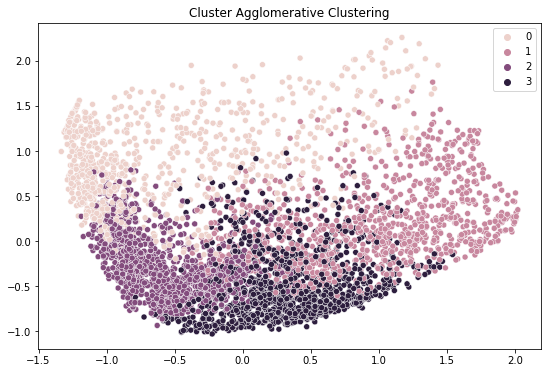

In [49]:
# scatterplot dari label 
plt.subplots(figsize=(9,6))
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=agg.labels_)
plt.title('Cluster Agglomerative Clustering')
plt.show()

- Secara garis besar hasil dari cluster dari Agglomerative Clustering memiliki kesamaan dari segi visualisai dengan clustering k-means
- Terdapat 4 cluster karena dari awal telah diatur n_cluster pada model definition

### EDA setelah dilakukan clustering Agglomerative Clustering

**1. Apakah persentase pembagian cluster Agglomerative Clustering sama dengan cluster k-means?**

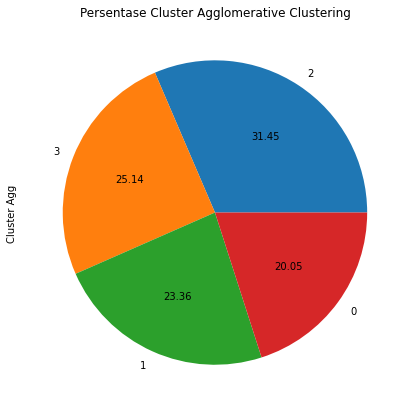

In [50]:
# tampilkan dalam bentuk persentase
data_set_cluster_agg['Cluster Agg'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%.2f')
plt.title('Persentase Cluster Agglomerative Clustering')
plt.show()

- Pada cluster Agglomerative Clustering terbagi atas cluster 0,1,2 dan 3.
- cluster 2 memiliki jumlah data terbanyak dengan persentase 31.45
- untuk cluster 0, 1 dan 3 memiliki jumlah yang hampir sama

**2. Berdasarkan PURCHASES_TRX dan balance bagaimana karakteristik dari masing-masing cluster?**

In [51]:
# groupby dari cluter untuk balance
data_set_cluster_agg.groupby('Cluster Agg')['BALANCE'].mean()

Cluster Agg
0    3675.258244
1    1613.455892
2    1081.366726
3     419.696794
Name: BALANCE, dtype: float64

In [52]:
# groupby dari cluter untuk transaksi pembelian 
data_set_cluster_agg.groupby('Cluster Agg')['PURCHASES_TRX'].sum()

Cluster Agg
0     9945
1    36830
2     2919
3    15434
Name: PURCHASES_TRX, dtype: int64

- cluster 0 ,tipe customer yang hemat karena memiliki rata-rata saldo tinggi tapi jumlah transaksi pembelian yang menegah. Customer yang membeli sesuai kebutuhan.
- cluster 1, tipe customer yang loyal karena saldo tinggi dan transaksi pembelian tinggi.
- cluster 2, tipe customer yang paham akan kondisi finansial karena saldo menengah berarti transaksi pembelian juga sewajarnya saja atau sesuai kebutuhan.
- cluster 3, tipe customer yang boros dan harus belajar mengelola finansial dengan baik. Mungkin tipe custumer mengikuti lifestyle yang tidak sesuai dengan keadaan finansialnya. Customer jenis ini harus diwaspadai karena ada kemungkinan besar terlambat membayar tagihan kartu kredit.

## **6.3 DBSCAN**

Sebelum menggunakan dbscan clustering terlebih dahulu mencari nilai epsilon yang tepat menggunakan KNN yaitu konsep jarak antar tetangga

In [53]:
# definisikan KNN dengan angka ganjil
neighb = NearestNeighbors(n_neighbors=3)

# fit datayang sdh direduksi
nbrs=neighb.fit(data_pca)

# cari tetangga terdekatnya
distances,indices = nbrs.kneighbors(data_pca)

Visualisasikan nilai epsilon yang terbaik dengan cara pada nilai epsilon berapa terjadi patahan

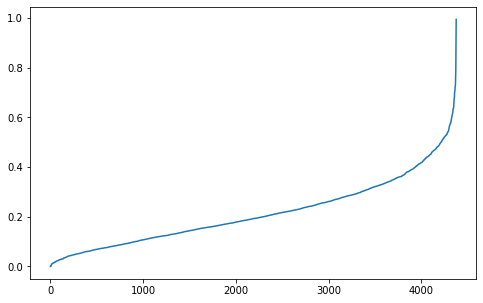

In [54]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.rcParams['figure.figsize'] = (8,5)
plt.plot(distances)
plt.show()

- Data visualisa diatas dapat dilihat bahwa patahan terjadi pada nilai epsilon 0.6.
- nilai epsilon yang terpilih akan digunakan untuk penentuan eps pada model dbscan dan min_sample = 4

In [55]:
# definiskan model dbscan
dbscan = DBSCAN(eps = 0.6, min_samples = 4)

# training the model
dbscan.fit(data_pca)

# lakukan labeling atau prediksi
labels = dbscan.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

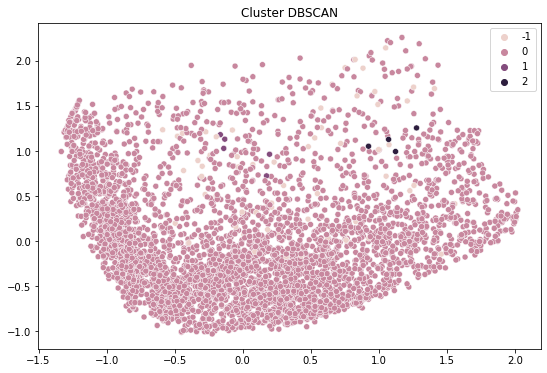

In [56]:
# scatterplot dari label 
plt.subplots(figsize=(9,6))
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=labels)
plt.title('Cluster DBSCAN')
plt.show()

- Berbeda dengan clustering k-means dan Agglomerative Clustering yang memilki 4 jenis cluster, untuk dbscan hanya memiliki 3 cluster dan outliers terdeteksi dengan label -1
- hasil clustering kurang baik krena tidak dapat merepresentasikan pembagian cluster dengan baik
- jumlah data cluster yang tidak seimbang

In [57]:
# buat menjadi dataframe
labels_df = pd.DataFrame(labels, columns=['Cluster dbscan'] )
labels_df

,Cluster dbscan
0,0
1,0
2,0
3,0
4,0
...,...
4370,0
4371,0
4372,0
4373,0


In [58]:
# gabungkan datset awal dan label hasil clustering
data_set_cluster_dbscan = pd.concat([(data_set), (labels_df)], axis=1)
data_set_cluster_dbscan

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster dbscan
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,312.807548,0.0,8,0
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,312.807548,0.0,8,0
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,0
4371,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,0
4372,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,0
4373,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,0


### EDA setelah dilakukan clustering DBSCAN

**Perbandingan jumlah masing-masing label**

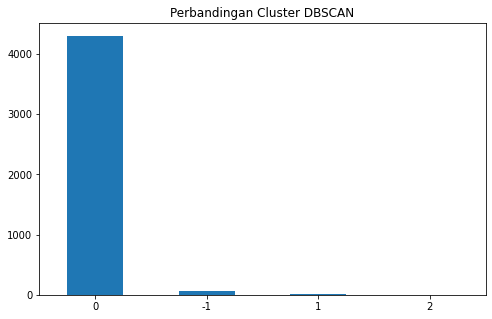

In [59]:
# bar plot perbandingan jumlah masing-masing label
data_set_cluster_dbscan['Cluster dbscan'].value_counts().plot(kind='bar')
plt.title('Perbandingan Cluster DBSCAN')
plt.xticks(rotation=0)
plt.show()

- terlihat bahwa label 0 memiliki banyak data sedangakan untuk label 1 dan 2 sangat sedikit
- -1 bukan cluster tetapi outliers
- tidak dapat dilihat karakteristik dari customer karena gagalnya model dbscan dalam representasi clustering
- dbscan tidak direkomendasikan untuk dataset ini

# **7. Model Inference**

In [60]:
# tampilkan data inf
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,8691,6644.829230,1.000000,0.00,0.00,0.00,2557.006793,0.000000,0.000000,0.000000,0.250000,9,0,7600.0,1648.570068,2284.360915,0.000000,12
1,7711,7.696813,0.090909,111.30,111.30,0.00,101.656544,0.083333,0.083333,0.000000,0.083333,1,2,1200.0,0.000000,NaN,0.000000,12
2,1795,850.630114,1.000000,0.05,0.05,0.00,1700.634586,0.083333,0.083333,0.000000,0.333333,7,1,1000.0,1084.281127,367.409536,0.000000,12
3,2849,391.508345,0.888889,80.99,80.99,0.00,2867.104779,0.111111,0.111111,0.000000,0.333333,3,1,1500.0,3855.328673,149.615036,0.200000,9
4,6567,349.855056,1.000000,3200.50,2097.88,1102.62,0.000000,1.000000,1.000000,1.000000,0.000000,0,50,7000.0,3119.528249,192.900599,1.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1347,666.123984,1.000000,1999.70,351.00,1648.70,0.000000,0.916667,0.250000,0.750000,0.000000,0,15,3100.0,667.118376,264.338574,0.200000,12
96,3007,6.247620,0.272727,108.20,0.00,108.20,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,4500.0,0.000000,NaN,0.000000,12
97,8663,680.079404,1.000000,636.41,106.01,530.40,2525.736564,1.000000,0.083333,1.000000,0.250000,10,19,12000.0,309.998666,266.056225,0.000000,12
98,7,16.379412,0.454545,178.15,0.00,178.15,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,5000.0,229.376368,89.613822,0.181818,12


In [61]:
# drop kolom country
data_inf_final = data_inf.drop(['CUST_ID'], axis=1)

In [62]:
# cek missing value
data_inf_final.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    7
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [63]:
# replace missing value MINIMUM_PAYMENTS
data_inf_final['MINIMUM_PAYMENTS'].fillna(data_inf_final['MINIMUM_PAYMENTS'].median(), inplace=True)

In [64]:
# scaling data dan buat dalam data frame
data_inf_scaled = scaler.fit_transform(data_inf_final)
data_inf_scaled_df = pd.DataFrame(data_inf_scaled, columns=data_inf_final.columns)
data_inf_scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.592929,1.000000,0.000000,0.000000,0.000000,0.284015,0.000000,0.000000,0.000000,0.333333,0.428571,0.000000,0.458065,0.078980,0.112129,0.000000,1.0
1,0.000687,0.090909,0.010208,0.014193,0.000000,0.011291,0.083333,0.083333,0.000000,0.111111,0.047619,0.014706,0.045161,0.000000,0.019087,0.000000,1.0
2,0.075903,1.000000,0.000005,0.000006,0.000000,0.188895,0.083333,0.083333,0.000000,0.444444,0.333333,0.007353,0.032258,0.051946,0.017740,0.000000,1.0
3,0.034935,0.888889,0.007428,0.010328,0.000000,0.318458,0.111111,0.111111,0.000000,0.444444,0.142857,0.007353,0.064516,0.184702,0.007016,0.200000,0.5
4,0.031218,1.000000,0.293537,0.267526,0.143137,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.367647,0.419355,0.149451,0.009147,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.059439,1.000000,0.183405,0.044760,0.214026,0.000000,0.916667,0.250000,0.750000,0.000000,0.000000,0.110294,0.167742,0.031960,0.012665,0.200000,1.0
96,0.000557,0.272727,0.009924,0.000000,0.014046,0.000000,0.416667,0.000000,0.416667,0.000000,0.000000,0.036765,0.258065,0.000000,0.019087,0.000000,1.0
97,0.060685,1.000000,0.058369,0.013519,0.068854,0.280541,1.000000,0.083333,1.000000,0.333333,0.476190,0.139706,0.741935,0.014852,0.012749,0.000000,1.0
98,0.001462,0.454545,0.016339,0.000000,0.023127,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.022059,0.290323,0.010989,0.004062,0.181818,1.0


In [65]:
# reduksi deimensi
pca_inf = PCA(n_components=8)
data_inf_pca = pca1.fit_transform(data_inf_scaled)

In [66]:
# Prediksi label
label_data_inf = kmeans.predict(data_inf_pca)
label_data_inf

array([1, 0, 0, 0, 2, 2, 2, 3, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 2, 3, 3,
       2, 3, 0, 0, 3, 2, 2, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 2,
       0, 0, 1, 3, 0, 0, 0, 2, 3, 1, 2, 0, 0, 3, 2, 3, 0, 3, 0, 2, 1, 0,
       1, 2, 0, 0, 1, 1, 3, 1, 3, 3, 0, 2, 0, 2, 0, 0, 3, 1, 0, 0, 2, 2,
       2, 0, 0, 1, 2, 0, 2, 2, 0, 3, 0, 1])

In [67]:
# reduksi dimensi menjadi 2
pca_inf2 = PCA(n_components=2)
# fit dan treansform data
pca_vis_inf = pca_kmeans.fit_transform(data_inf_pca)
# masukkan data kedalam dataframe
pca_inf_df = pd.DataFrame.from_records(data=pca_vis_inf, columns=["x1","x2"])
# gabungkan dengan label dari cluster
pca_inf_df["Cluster"] = label_data_inf + 1

In [68]:
# buat scatter plot untuk visualisasi 2d
fig = px.scatter(pca_inf_df, x="x1", y="x2", color='Cluster', width=600, height=500)
fig.show()

Arti warna dari setiap cluster
- kuning = cluster 4
- orange = cluster 3
- ungu = cluster 2
- biru = cluster 1

Dapat dilihat bahwa pembagian cluster pada data inference sama dengan pembagian cluster dataset. Untuk data inference ini menggunakan k-means karena model tersebut yang memiliki pembagian cluster yang cukup sesuai.

Dari sebaran data diatas dapat dilihat bahwa cluster 1 memiliki jumlah data yang paling banyak. Untuk cluster 4 jaraknya lumayan cukup jauh tetapi tidak dianggap sebagai outliers karena pada k-means tidak mendeteksi outliers seperti halnya pada dbscan.

In [69]:
# gabungkan data inferece awal dan label hasil clustering
data_inf_cluster = pd.concat([(data_inf), (pca_inf_df["Cluster"])], axis=1)
data_inf_cluster

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,8691,6644.829230,1.000000,0.00,0.00,0.00,2557.006793,0.000000,0.000000,0.000000,0.250000,9,0,7600.0,1648.570068,2284.360915,0.000000,12,2
1,7711,7.696813,0.090909,111.30,111.30,0.00,101.656544,0.083333,0.083333,0.000000,0.083333,1,2,1200.0,0.000000,NaN,0.000000,12,1
2,1795,850.630114,1.000000,0.05,0.05,0.00,1700.634586,0.083333,0.083333,0.000000,0.333333,7,1,1000.0,1084.281127,367.409536,0.000000,12,1
3,2849,391.508345,0.888889,80.99,80.99,0.00,2867.104779,0.111111,0.111111,0.000000,0.333333,3,1,1500.0,3855.328673,149.615036,0.200000,9,1
4,6567,349.855056,1.000000,3200.50,2097.88,1102.62,0.000000,1.000000,1.000000,1.000000,0.000000,0,50,7000.0,3119.528249,192.900599,1.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1347,666.123984,1.000000,1999.70,351.00,1648.70,0.000000,0.916667,0.250000,0.750000,0.000000,0,15,3100.0,667.118376,264.338574,0.200000,12,3
96,3007,6.247620,0.272727,108.20,0.00,108.20,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,4500.0,0.000000,NaN,0.000000,12,1
97,8663,680.079404,1.000000,636.41,106.01,530.40,2525.736564,1.000000,0.083333,1.000000,0.250000,10,19,12000.0,309.998666,266.056225,0.000000,12,4
98,7,16.379412,0.454545,178.15,0.00,178.15,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,5000.0,229.376368,89.613822,0.181818,12,1


# **8. Conceptual Problems**

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

    inersia merupakan besar radius yang dibuat dalam clustering. Makin besar inersia makin bagus karena semakin banyak data yang bisa dicakupkan didalamnya tetapi jika terlalu besar bisa saja akan menempatkan data poin pada cluster yang tidak seharusnya. Setiap radius atau inersia masing-masing cluster adalah sama besar.

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

    Elbow method merupakan metoda yangdigunakan menentukan jumlah cluster yang optimlal pada k-means clustering. Cara penggunaan melihat persentase hasil perbandingan antara jumlah cluster yang akan membentuk patahan pada suatu titik. Kelebihannya membantu melihat jumlah cluster yang optimal dengan mudah melalui patahan dan kekurangannya biasanya terdapat lebih dari satu patahan sehingga agak membingungkan ingin memiliki jumlah cluster yang mana.

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

    - K-means clustering, mengelompokkan data ke dalam kelompok yang memiliki karakteristik yang sama kedalam satu kelompok. Sedangkan karakteristik antar cluster memiliki sifat yang berbeda. Cara pengelompokkan yaitu menghitung jarak terhadap centroid atau pusat data tiap cluster.
    - Agglomerative Clustering, menganggap setiap unit data sebagai satu cluster kecil (leaf), lalu pada selanjutnya dua cluster yang memiliki kemiripan akan dikelompokkan menjadi satu cluster yang lebih besar (nodes). Proses ini akan dilakukan terus menerus hingga semua data menjadi satu cluster besar (root).
    - DBSCAN, metode clustering yang berdasarkan density (kepadatan suatu data). Setiap objek dari sebuah radius area (cluster) harus mengandung setidaknya sejumlah minimum data (min points).

# **9. Kesimpulan**

Diberikan data set `credit card information` yang akan dilakukan customer segmentation atau mengelompokkan customer berdasarkan karakteristiknya. Dataset terdiri 18 kolom dan 4475 baris dengan memiliki nilai NaN.

**EDA**
- berdasarkan heatmap, banyak fitur yang memiliki korelasi yang tinggi hal ini disebabkan informasi yang diperoleh dari suatu fitur ada kaitannya dengan fitur yang lain dalam artian informasi yang dibawa sama.
- Balance atau saldo yang ada secara garis besar menggambarkan kondisi finansial customer, oleh karena itu jika semakin tinggi saldo yang dimiliki maka pihak kartu kredit akan memberikan limit kredit yang tinggi juga.

**Preprosessing**
Pada preprossing data inference dipisahkan dengan data set yang asli. Kemudian dilakukan feature selection, data cleaning dan scaling. Karena korelasi antar fitur tinggi, untuk mencegah doublenya informasi yang diterima model maka dilakukan reduksi dimensi menggunakan PCA. Hasil dari PCA ini menghasilkan 8 komponen gabungan dan hasil ini yang akan dimasukkan dalam model.

**Model Clustering**
- K-means, dari model ini cluster dibagi menjadi 4 cluster. Pemilihan cluster yang tepat menggunakan elbow method dan silhouette scores. Dari segi visualisasi pembagian cluster dianggap sudah cukup baik. Berdasarkan balance, credit limit dan purchases. cluster 4 merupakan customer yang loyal, cluster 3 merupakan customer yang lifestyle tinggi dan boros tetapi tidak baik secara finansial, cluster 2 merupakan customer yang hemat, dan cluster 1 merupakan customer yang mengetahui batasan dirinya karena finansial tidak stabil maka pengeluran juga dilakukan seperlunya.
- Agglomerative Clustering, dari model ini cluster dibagi menjadi 4 cluster. Berdasarkan balance dan purchases transaksi cluster 0 tipe customer yang hemat karena memiliki rata-rata saldo tinggi tapi jumlah transaksi pembelian yang menegah, cluster 1 tipe customer yang loyal,cluster 2 tipe customer yang paham akan kondisi finansial dan  cluster 3, tipe customer yang boros dan harus belajar mengelola finansial dengan baik (harus diwaspadai karena ada kemungkinan besar terlambat membayar tagihan kartu kredit).
- DBSCAN, dalam model ini gagal merepresentasikan cluster yang seharusnya karena model ini berdasarkan kepdatan suatu data. Hanya ada 3 cluster yng terbentuk pada model ini dan model ini bisa menteksi adanya outlier yamg dilabelkan dengan -1. Untuk dataset ini model dbscan ini tidak direkomendasikan.

**Model Inference**
Pembagian cluster pada data inference sama dengan pembagian cluster dataset. Untuk data inference ini menggunakan k-means karena model tersebut yang memiliki pembagian cluster yang cukup sesuai.
Dari visualisasi sebaran data dapat dilihat bahwa cluster 1 memiliki jumlah data yang paling banyak. Untuk cluster 4 jaraknya lumayan cukup jauh tetapi tidak dianggap sebagai outliers karena pada k-means tidak mendeteksi outliers seperti halnya pada dbscan.